In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import unicodedata
import scipy.stats as stat

In [72]:
def eVtoJ(eV):
    return(eV*1.602*10**-19)

def JtoeV(J):
    return(J/(1.602*10**-19))

def nonRelativistic_velocity(E,m):
    v = np.sqrt(2*E/m)
    return(v)

def Relativistic_velocity(E,m):
    c = 299792458 #m/s
    v = c * np.sqrt(1 - (E/(m*c**2)+1)**-2) #m/s
    print("Velocity = "+str(v))
    return(v)

def Bethe(m,E,N,Z,z,I):
    c = 299792458 #m/s
    e = 1.6021766208 * 10 ** -19 #C
    eta = 8.854187817620*10**-12 #C^2*s^2/(kg*m^3) 
    E = eVtoJ(E*10**6) #J
    v = Relativistic_velocity(E,m) #m/s
    C = (4*np.pi*e**4*z**2)/m * N /(4*np.pi*eta)**2#*Z
    print(C)
    S = C*v**-2*( np.log((2*m*v**2)/I) - np.log(1-(v/c)**2) - (v/c)**2 ) * 10**4
    return(JtoeV(S)*10**-6)

In [66]:
c = 299792458 #m/s
e = 1.6021766208 * 10 ** -19 #C
me = 9.109534 * 10 ** -31 #kg
N_a = 6.022 * 10 ** 23 #mol^-1

I_Si = eVtoJ(173) #J #140
Z_Si = 14
Rho_Si = 2.33 #g/cm^3 #2.329
M_Si = 28.085 #g/mol
N_Si = (N_a * Z_Si / M_Si) #g^-1
print(N_Si)

3.0018871283603345e+23


In [67]:
b = Bethe(me, 1*10**-2, N_Si, Z_Si, 1, I_Si)
print(b) #MeV*cm^2/g
#print(16.89/b)

Velocity = 58451616.70385952
0.22041057821949492
21.80622517962155


In [76]:
Data1 = pd.read_csv("Data.txt", sep = "|", header = None)
K = np.array(Data1[0])
S = np.array(Data1[1])
ST = np.array(Data1[2])

Velocity = [5.84516167e+07 1.70349845e+08 2.11492740e+08 ... 2.99792419e+08
 2.99792419e+08 2.99792419e+08]
0.22041057821949492


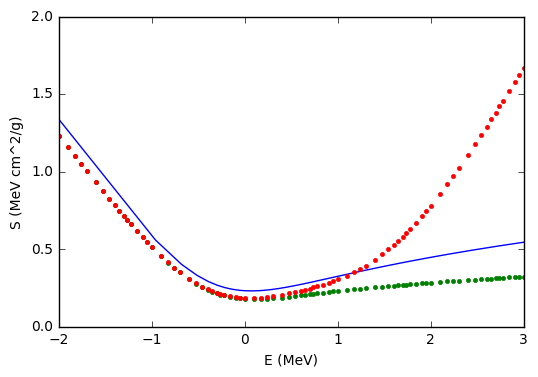

In [78]:
E_x = np.linspace(10**-2, 10**3, 10000)
y = Bethe(me, E_x, N_Si, Z_Si, 1, I_Si)
fig = plt.figure()
plt.plot(np.log10(E_x), np.log10(y))
plt.errorbar(np.log10(K),np.log10(S),fmt = '.')
plt.errorbar(np.log10(K),np.log10(ST),fmt = '.')
plt.xlabel("E (MeV)")
plt.ylabel("S (MeV cm^2/g)")
plt.axis([-2, 3, 0, 2])
plt.show()

In [10]:
print(np.log10(10**4))

4.0


In [11]:
print(200*10*3/(2.47*10**6*1.225*10**-3))
print((1.225*10**-3/0.0508)**-1) #stoppingpath length = CSDA-Range/density

1.982979426588449
41.469387755102034
